# Heart Disease Prediction Analysis

## Loading Dependancies & Data

In [1]:
# Importing our dependancies

import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 20)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from our dataset

df = pd.read_csv('Heart_disease_cleveland_new.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


## Exploratory Data Analysis

In [3]:
# checking general dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# checking statistical info from our data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,2.158416,0.960126,0.0,2.0,2.0,3.0,3.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
# checking value count of our categorical columns

categorical_cols = ['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_cols:
    print(df[col].value_counts())

sex
1    206
0     97
Name: count, dtype: int64
cp
3    144
2     86
1     50
0     23
Name: count, dtype: int64
fbs
0    258
1     45
Name: count, dtype: int64
restecg
0    151
2    148
1      4
Name: count, dtype: int64
exang
0    204
1     99
Name: count, dtype: int64
slope
0    142
1    140
2     21
Name: count, dtype: int64
ca
0    180
1     65
2     38
3     20
Name: count, dtype: int64
thal
1    168
3    117
2     18
Name: count, dtype: int64
target
0    164
1    139
Name: count, dtype: int64


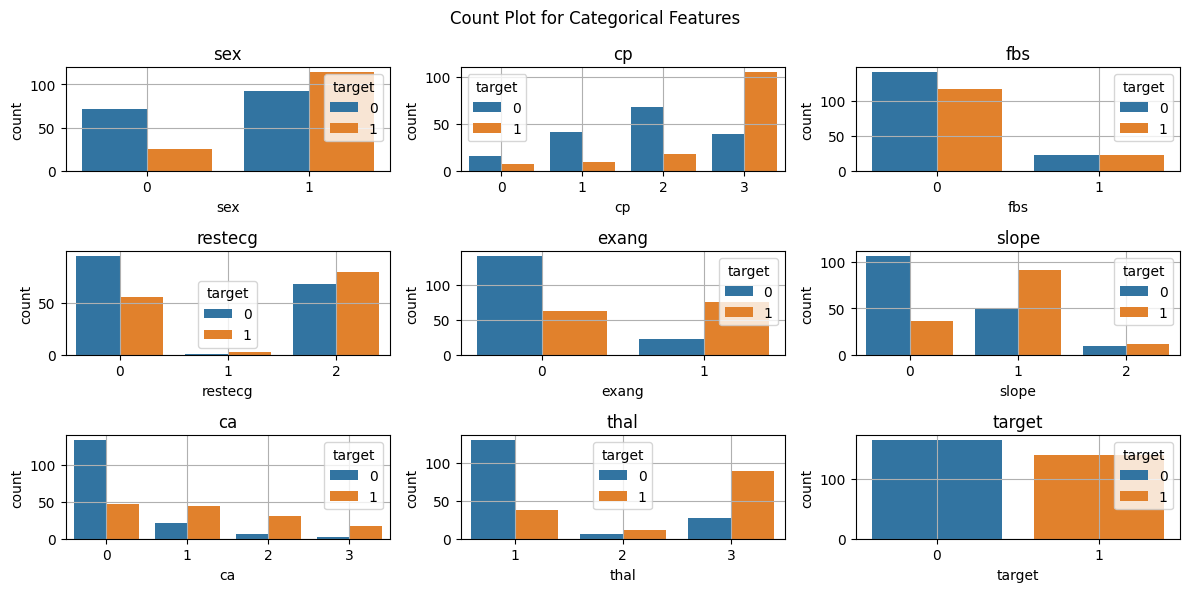

In [6]:
# plotting value counts of our categorical columns against our target column

len(categorical_cols)

plt.figure(figsize=(12, 6))

plt.suptitle("Count Plot for Categorical Features")
for i in enumerate(categorical_cols):
    plt.subplot(3, 3, i[0]+1)
    sns.countplot(data=df, x=i[1], hue='target')
    plt.title(i[1])
    plt.grid()


plt.tight_layout()
plt.show()

In [7]:
# getting a list of all columns in our dataset

columns = df.columns.to_list()
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [8]:
# checking for missing values in our dataset

df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
# checking for duplicate data in our dataset

df.duplicated().sum()

np.int64(0)

In [10]:
# getting a list of all numerical columns in our data for outlier detection

numerical_cols = [x for x in columns if x not in categorical_cols]
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Outlier Detection

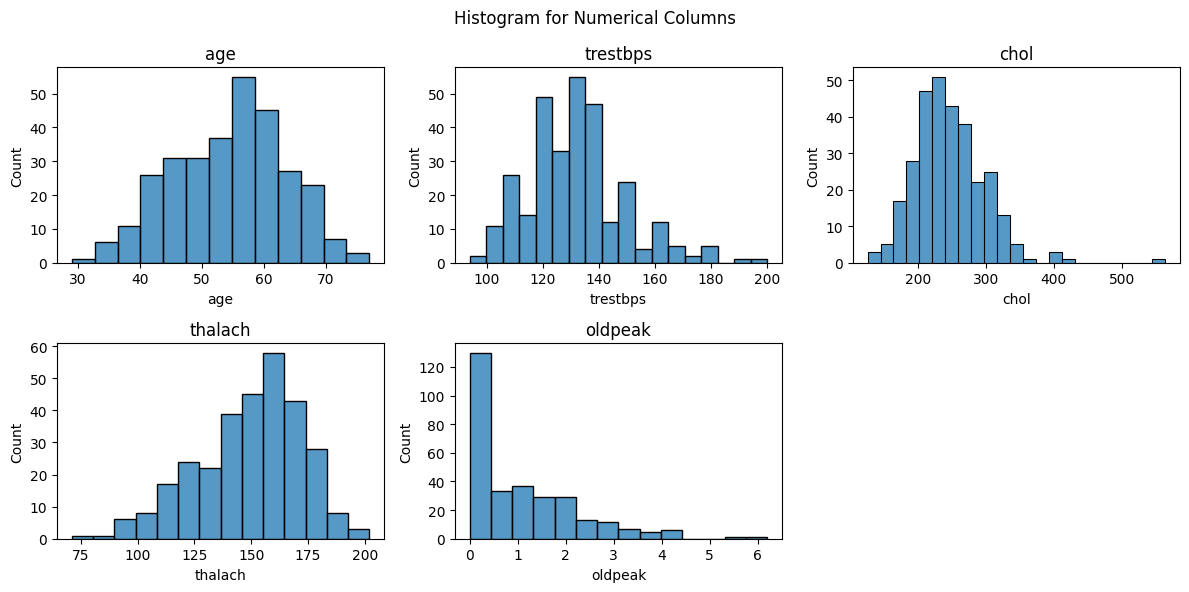

In [11]:
# plotting Histograms of numerical columns to see their distribution

plt.figure(figsize=(12, 6))
plt.suptitle("Histogram for Numerical Columns")

for i in enumerate(numerical_cols):
    plt.subplot(2, 3, i[0]+1)
    sns.histplot(data=df, x=i[1])
    # plt.grid()
    plt.title(i[1])


plt.tight_layout()
plt.show()

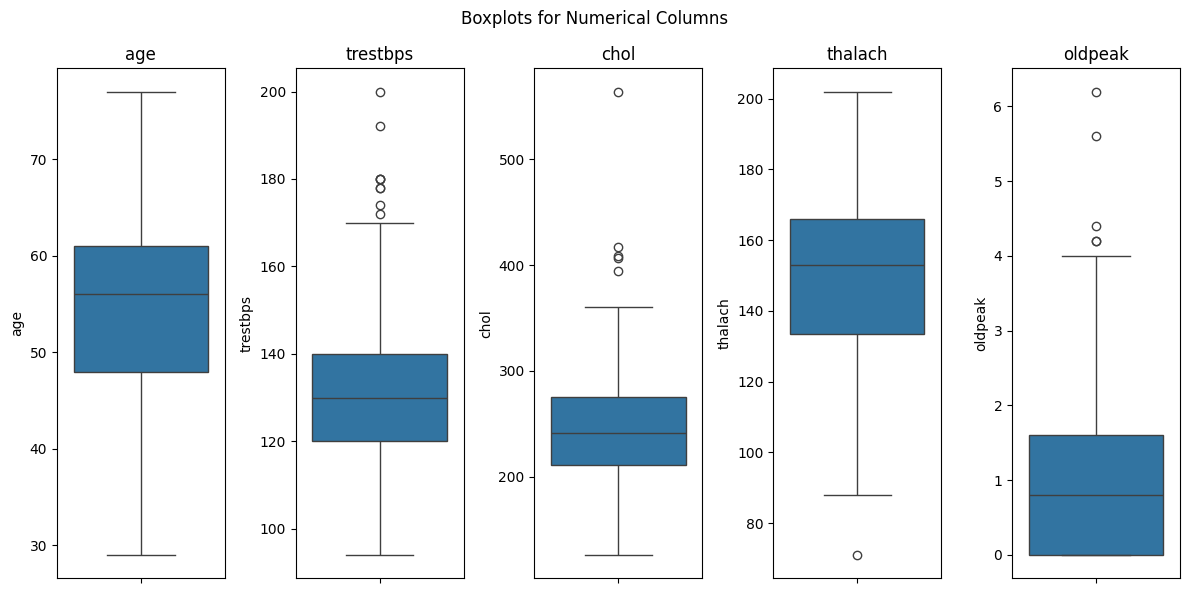

In [12]:
# plotting boxplots of our numerical columns for outlier detection

plt.figure(figsize=(12, 6))
plt.suptitle("Boxplots for Numerical Columns")

for i in enumerate(numerical_cols):
    plt.subplot(1, 5, i[0]+1)
    sns.boxplot(data=df, y=i[1])
    # plt.grid()
    plt.title(i[1])


plt.tight_layout()
plt.show()

## Outlier Removal/Clipping

In [13]:
# clipping outliers instead of dropping them because we have a small dataset
# function for clipping outliers

def clip_past_whiskers(data):
    for col in numerical_cols:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        data[col] = data[col].clip(lower, upper)

    return data

In [14]:
# calling our function for outlier clipping

df = clip_past_whiskers(df)

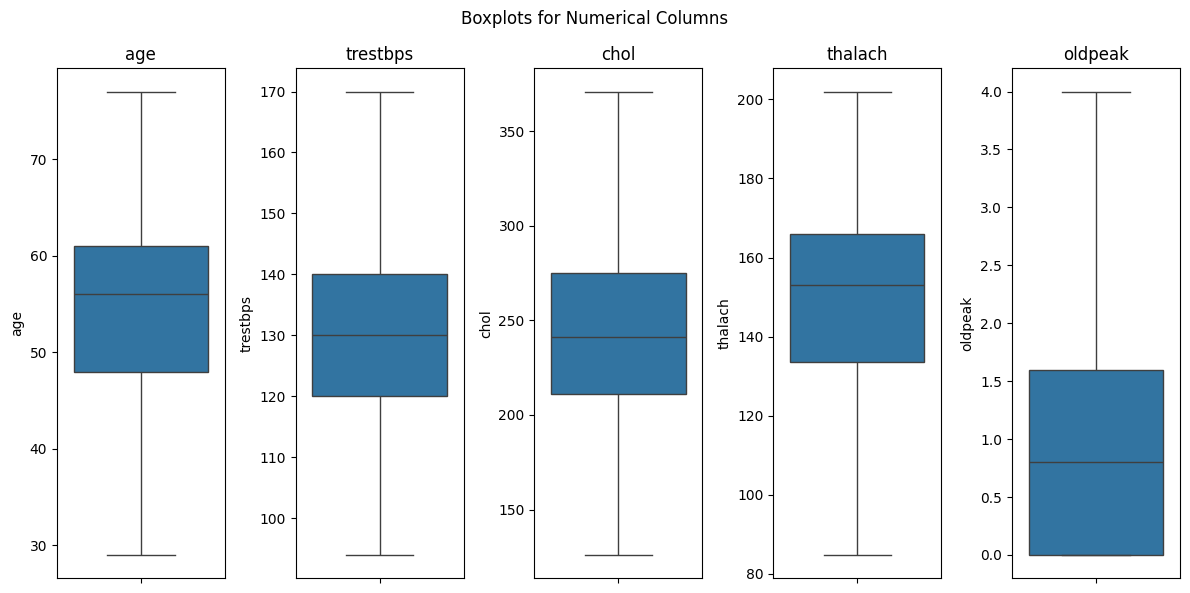

In [15]:
# plotting boxplots of our numerical columns to visualize if outliers have been clipped

plt.figure(figsize=(12, 6))
plt.suptitle("Boxplots for Numerical Columns")

for i in enumerate(numerical_cols):
    plt.subplot(1, 5, i[0]+1)
    sns.boxplot(data=df, y=i[1])
    # plt.grid()
    plt.title(i[1])


plt.tight_layout()
plt.show()

In [16]:
# checking the shape of our data to ensure same number of rows

df.shape

(303, 14)

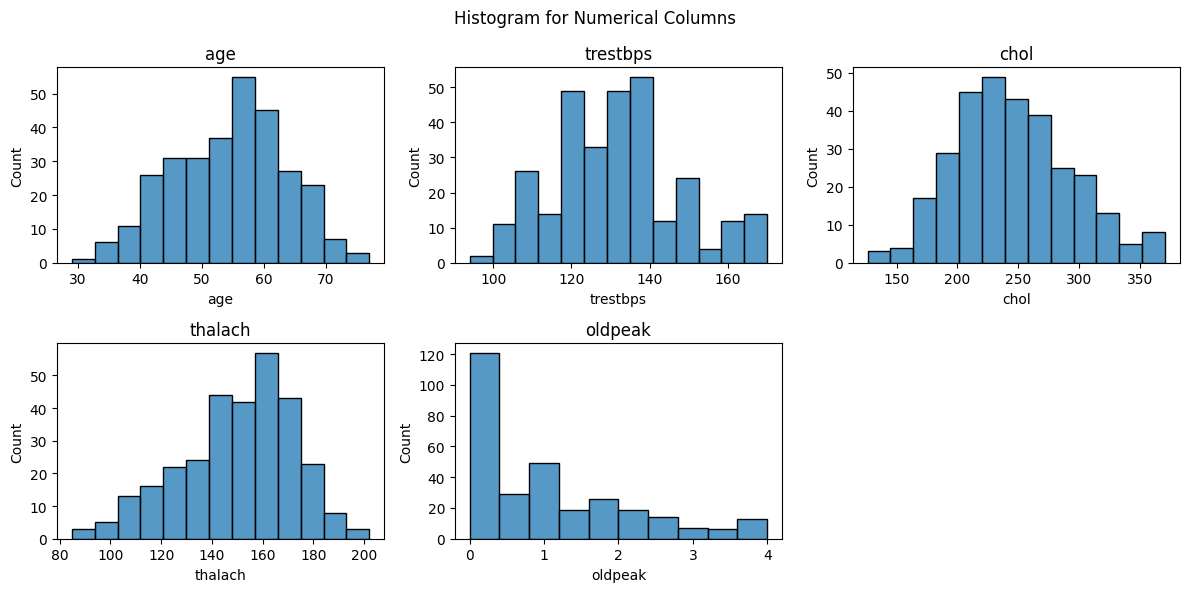

In [17]:
# checking distribution after clipping

plt.figure(figsize=(12, 6))
plt.suptitle("Histogram for Numerical Columns")

for i in enumerate(numerical_cols):
    plt.subplot(2, 3, i[0]+1)
    sns.histplot(data=df, x=i[1])
    # plt.grid()
    plt.title(i[1])


plt.tight_layout()
plt.show()

## Correlation Checking

In [18]:
# getting our correlation matrix to see how data is correlated

corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.292061,0.200896,0.118530,0.148868,-0.393504,0.091661,0.206829,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.055920,-0.183610,0.047862,0.021647,-0.047598,0.146201,0.111505,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.039697,0.075559,-0.039975,0.067505,-0.334774,0.384060,0.201397,0.152050,0.233117,0.259835,0.414446
trestbps,0.292061,-0.055920,-0.039697,1.000000,0.141127,0.166062,0.145531,-0.052293,0.052366,0.176209,0.109391,0.096924,0.118845,0.144980
chol,0.200896,-0.183610,0.075559,0.141127,1.000000,0.011476,0.162468,-0.012357,0.077386,0.049307,-0.014385,0.134170,0.014613,0.103896
fbs,0.118530,0.047862,-0.039975,0.166062,0.011476,1.000000,0.069564,-0.008739,0.025665,0.011732,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.145531,0.162468,0.069564,1.000000,-0.085908,0.084867,0.117436,0.133946,0.131749,0.019115,0.169202
thalach,-0.393504,-0.047598,-0.334774,-0.052293,-0.012357,-0.008739,-0.085908,1.000000,-0.381879,-0.350351,-0.386733,-0.268795,-0.261347,-0.417624
exang,0.091661,0.146201,0.384060,0.052366,0.077386,0.025665,0.084867,-0.381879,1.000000,0.299565,0.257748,0.145788,0.321680,0.431894
oldpeak,0.206829,0.111505,0.201397,0.176209,0.049307,0.011732,0.117436,-0.350351,0.299565,1.000000,0.573853,0.297810,0.333742,0.430309


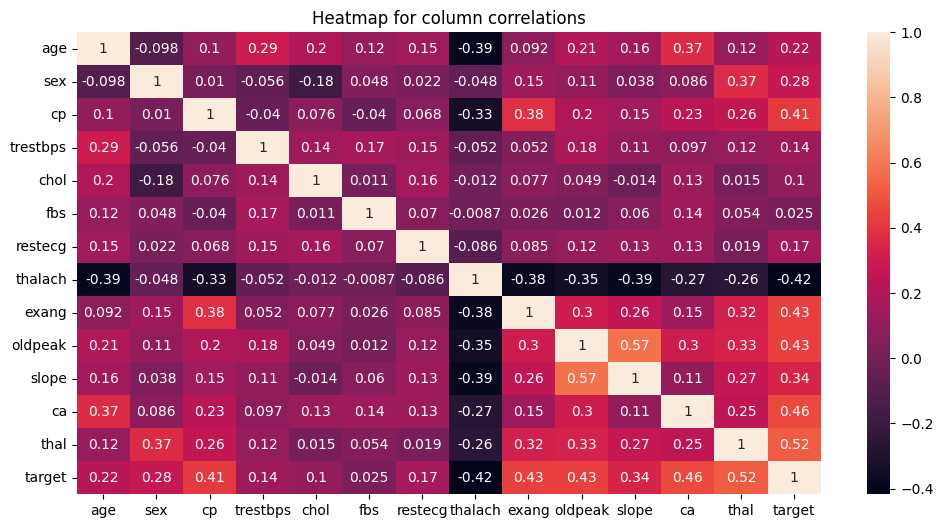

In [19]:
# visualizing data correlation using a heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Heatmap for column correlations")
plt.show()

In [20]:
# checking each column correlation against our target column

df.corr()['target']

,target
age,0.223120
sex,0.276816
cp,0.414446
trestbps,0.144980
chol,0.103896
fbs,0.025264
restecg,0.169202
thalach,-0.417624
exang,0.431894
oldpeak,0.430309


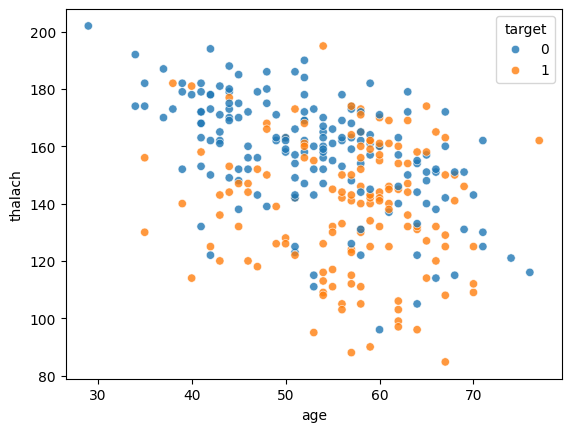

In [21]:
# random scatterplot from our data

sns.scatterplot(data=df, x='age', y='thalach', hue='target', alpha=0.8)
plt.show()

## Feature Dropping

In [22]:
# dropping columns with almost no correlation

df = df.drop(['chol', 'trestbps', 'fbs', 'restecg'], axis=1)
df.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,150.0,0,2.3,2,0,2,0
1,67,1,3,108.0,1,1.5,1,3,1,1
2,67,1,3,129.0,1,2.6,1,2,3,1
3,37,1,2,187.0,0,3.5,2,0,1,0
4,41,0,1,172.0,0,1.4,0,0,1,0


In [23]:
# checking data shape after dropping columns with least correlation

df.shape

(303, 10)

## Data Splitting

In [24]:
# separating features from target column

y = df['target']
X = df.drop('target', axis=1)

# splitting our data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Training of Models

In [25]:
# putting our models in a dictionary

models = {
    "xgboost": xgb.XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "GaussianNB": GaussianNB(),
    "Vector Classifier": SVC(kernel='linear')
}

# empty list for collecting trained models
trained_models = []

# iterating through the dictionary while training our models
for name, model in models.items():
    # fitting the model
    model.fit(X_train, y_train)

    # making predictions
    pred = model.predict(X_test)

    # calculating accuracy
    accuracy = accuracy_score(y_test, pred)

    # calculating f1 score
    f1 = f1_score(y_test, pred)

    # calculating precision
    precision = precision_score(y_test, pred)

    print("\n________{}_________".format(name))
    print("Accuracy score: {}".format(accuracy))
    print("F1 score: {}".format(f1))
    print("Precision score: {}".format(precision))

    # appending trained models to the empty list
    trained_models.append(model)


________xgboost_________
Accuracy score: 0.8709677419354839
F1 score: 0.8888888888888888
Precision score: 0.8888888888888888

________Random Forest_________
Accuracy score: 0.9354838709677419
F1 score: 0.9444444444444444
Precision score: 0.9444444444444444

________Decision Tree_________
Accuracy score: 0.8387096774193549
F1 score: 0.8648648648648649
Precision score: 0.8421052631578947

________Logistic Regression_________
Accuracy score: 0.9354838709677419
F1 score: 0.9444444444444444
Precision score: 0.9444444444444444

________KNN_________
Accuracy score: 0.6774193548387096
F1 score: 0.6875
Precision score: 0.7857142857142857

________GaussianNB_________
Accuracy score: 0.9032258064516129
F1 score: 0.918918918918919
Precision score: 0.8947368421052632

________Vector Classifier_________
Accuracy score: 0.9032258064516129
F1 score: 0.918918918918919
Precision score: 0.8947368421052632


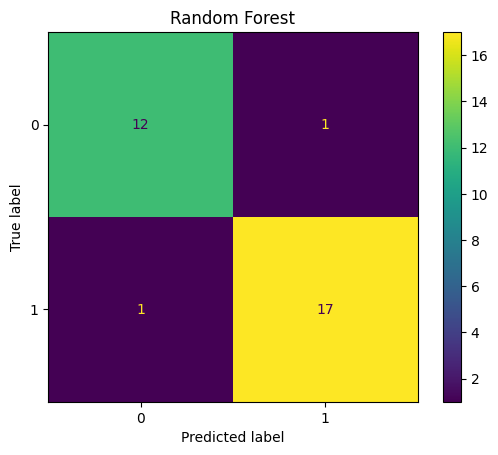

In [26]:
# confusion matrix for our best tree model(Random Forest)

pred = trained_models[1].predict(X_test)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, display_labels=trained_models[1].classes_)
disp.plot()
plt.title("Random Forest")
plt.show()

## Tuning Best Model

In [27]:
# parameter tuning for our random forest model

# initializing our estimator
model = RandomForestClassifier()

# dictionary of parameters we want to tune
params = {
    "n_estimators": [100, 200, 300],
    "criterion": ['gini', "entropy", 'log_loss'],
    "min_samples_split": [1, 2, 3, 4, 5]
}

# initializing our grid object
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# fitting our grid object
grid.fit(X_train, y_train)

# printing best found parameters
print("The best parameters are: {}".format(grid.best_params_))

# printing the best score
print("The best scoring is: {}".format(grid.best_score_))

# putting the best model in a variable
best_model = grid.best_estimator_

The best parameters are: {'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 100}
The best scoring is: 0.8200000000000001


In [28]:
# testing the accuracy of our tuned best model

pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("The best model has an accuracy of: {}".format(accuracy))

The best model has an accuracy of: 0.9354838709677419


In [29]:
# checking feature importance for our tuned model

fi = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fi

,0
thal,0.159333
ca,0.155879
cp,0.147558
oldpeak,0.143506
thalach,0.131711
age,0.114613
exang,0.068466
slope,0.042186
sex,0.036749


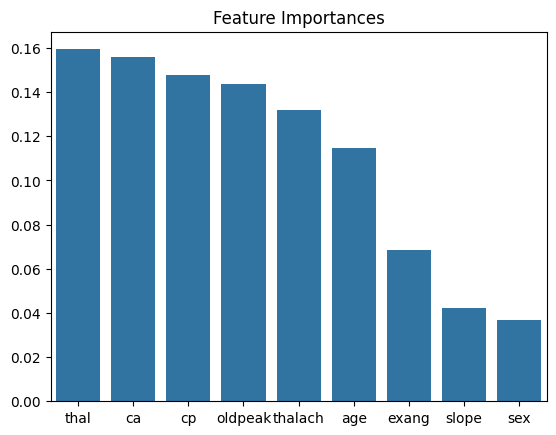

In [30]:
# plotting feature importance

sns.barplot(fi)
plt.title("Feature Importances")
plt.show()

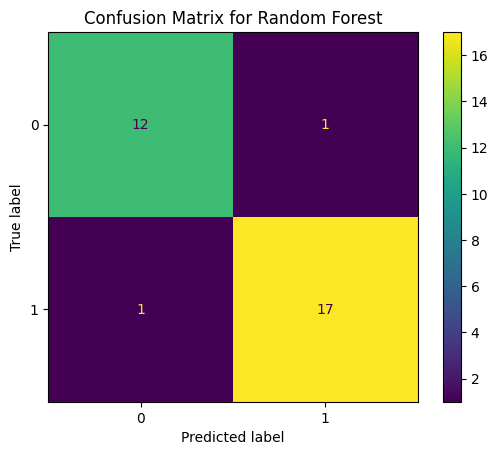

In [31]:
# plotting confusion matrix for our tuned model

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

## Doing Shap Analysis

In [32]:
# creating our explainer
explainer = shap.TreeExplainer(best_model)

# calculating shap values from our explainer
shap_values = explainer.shap_values(X_test)

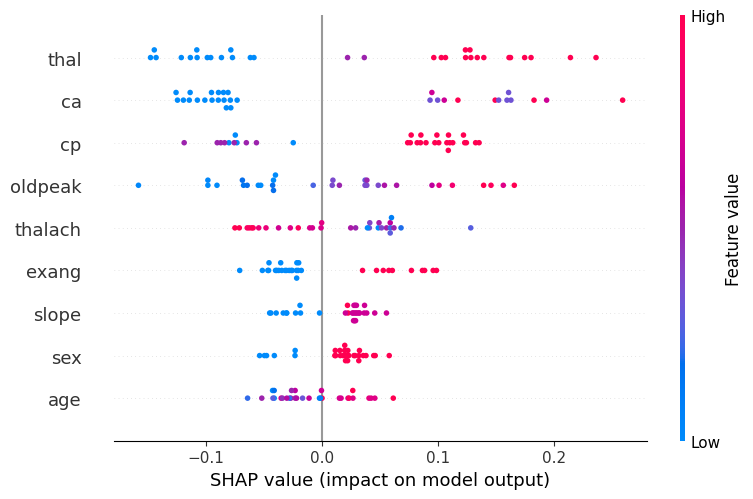

In [33]:
# feature summary plot from our explainer

shap.summary_plot(shap_values[:, :, 1], X_test)

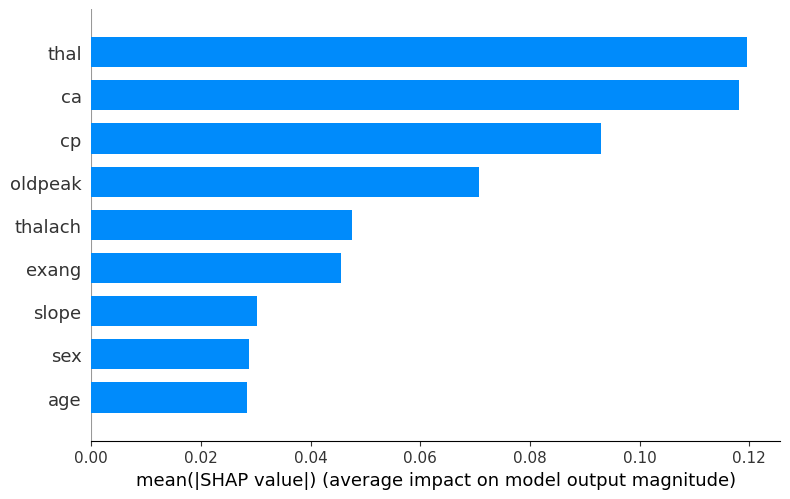

In [34]:
# summary plot in form of a bar chart

shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")

In [ ]:
# shap analysis on a single sample
shap.initjs()
sample = X_test.iloc[1,:]
shap.force_plot(explainer.expected_value[1], shap_values[:, :, 1][0,:], sample)

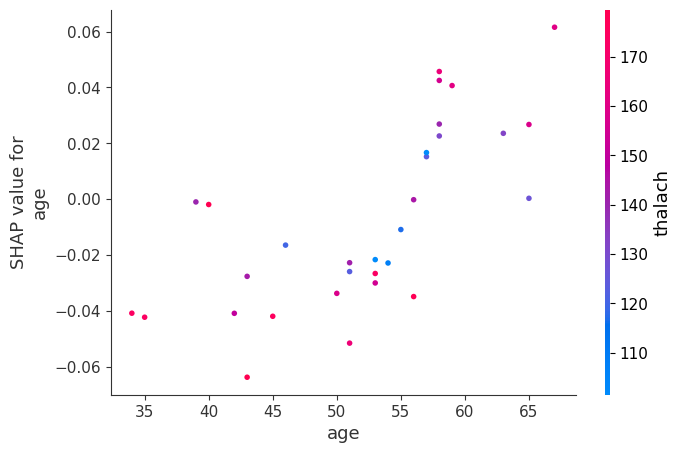

In [36]:
# dependancy plot
shap.dependence_plot("age", shap_values[:, :, 1], X_test)

In [37]:
# saving our model and explainer
import joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(explainer, 'explainer.plk')

['explainer.plk']